# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
#pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11909 entries, 0 to 11908
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11909 non-null  int64  
 1   Country              11909 non-null  string 
 2   Disaster Group       11909 non-null  string 
 3   Disaster Subgroup    11909 non-null  string 
 4   Disaster Type        11909 non-null  string 
 5   Disaster Subtype     9776 non-null   string 
 6   Disaster Subsubtype  977 non-null    string 
 7   Total Damages        11909 non-null  float64
 8   CPIAUCNS             11909 non-null  float64
 9   CPI Multiplier       11909 non-null  float64
dtypes: float64(3), int64(1), string(6)
memory usage: 1023.4 KB


In [5]:
data.sort_values('Total Damages', ascending = False).head()

,Year,Country,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Total Damages,CPIAUCNS,CPI Multiplier
8505,2011,Japan,Natural,Geophysical,Earthquake,Tsunami,<NA>,240.858523,224.939167,1.146945
2886,1995,Japan,Natural,Geophysical,Earthquake,Ground movement,<NA>,169.298871,152.383333,1.692989
6388,2005,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,165.146380,195.291667,1.321171
7358,2008,China,Natural,Geophysical,Earthquake,Ground movement,<NA>,101.869476,215.302500,1.198464
10730,2017,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,99.983503,245.119583,1.052458


# SPLIT  DISASTER SUBGROUPS

In [6]:
# display unique subgroups
for subgroup in data['Disaster Subgroup'].unique():
    print(subgroup)

Climatological
Geophysical
Hydrological
Meteorological


In [7]:
# create new dataframes for each subgroup
climatological_data = data[data['Disaster Subgroup'] == 'Climatological']
geophysical_data = data[data['Disaster Subgroup'] == 'Geophysical']
meteorological_data = data[data['Disaster Subgroup'] == 'Meteorological']
hydrological_data = data[data['Disaster Subgroup'] == 'Hydrological']

# count number of disasters in each year for each subgroup
climatological_disaster_counts = climatological_data['Year'].value_counts().sort_index()
geophysical_disaster_counts = geophysical_data['Year'].value_counts().sort_index()
meteorological_disaster_counts = meteorological_data['Year'].value_counts().sort_index()
hydrological_disaster_counts = hydrological_data['Year'].value_counts().sort_index()

# save index of years
disaster_counts_index = disaster_counts.index
climatological_disaster_counts_index = climatological_disaster_counts.index
geophysical_disaster_counts_index = geophysical_disaster_counts.index
meteorological_disaster_counts_index = meteorological_disaster_counts.index
hydrological_disaster_counts_index = hydrological_disaster_counts.index

# PLOT DISASTER SUBGROUPS

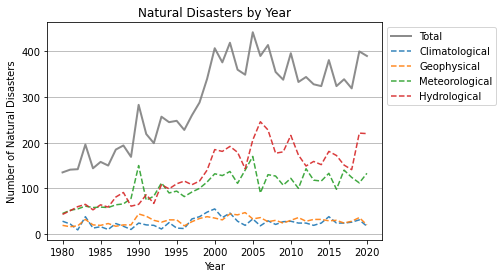

In [202]:
# single line plot

plt.grid(axis = 'y')
plt.title("Natural Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")

plt.plot(disaster_counts_index, disaster_counts, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
plt.plot(climatological_disaster_counts_index, climatological_disaster_counts, linestyle = '--', color = 'C0', alpha = 0.9, label = 'Climatological')
plt.plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linestyle = '--', color = 'C1', alpha = 0.9, label = 'Geophysical')
plt.plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linestyle = '--', color = 'C2', alpha = 0.9, label = 'Meteorological')
plt.plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linestyle = '--', color = 'C3', alpha = 0.9, label = 'Hydrological')
plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

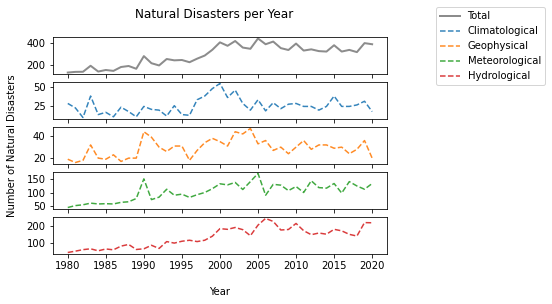

In [210]:
# multiple line plots

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Natural Disasters per Year")
axs[2].set_ylabel("Number of Natural Disasters\n")
axs[4].set_xlabel("\nYear")

axs[0].plot(disaster_counts_index, disaster_counts, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
axs[1].plot(climatological_disaster_counts_index, climatological_disaster_counts, linestyle = '--', color = 'C0', alpha = 0.9, label = 'Climatological')
axs[2].plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linestyle = '--', color = 'C1', alpha = 0.9, label = 'Geophysical')
axs[3].plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linestyle = '--', color = 'C2', alpha = 0.9, label = 'Meteorological')
axs[4].plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linestyle = '--', color = 'C3', alpha = 0.9, label = 'Hydrological')
fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

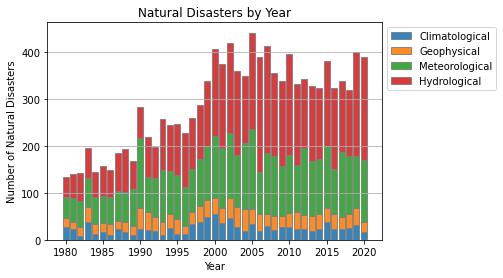

In [104]:
# single bar chart

bottom1 = climatological_disaster_counts
bottom2 = np.add(bottom1, geophysical_disaster_counts).tolist()
bottom3 = np.add(bottom2, meteorological_disaster_counts).tolist()

plt.grid(axis = 'y')
plt.title("Natural Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")

plt.bar(climatological_disaster_counts_index, climatological_disaster_counts, edgecolor = 'grey', alpha = 0.9, label = 'Climatological')
plt.bar(geophysical_disaster_counts_index, geophysical_disaster_counts, bottom = bottom1, edgecolor = 'grey', alpha = 0.9, label = 'Geophysical')
plt.bar(meteorological_disaster_counts_index, meteorological_disaster_counts, bottom = bottom2, edgecolor = 'grey', alpha = 0.9, label = 'Meteorological')
plt.bar(hydrological_disaster_counts_index, hydrological_disaster_counts, bottom = bottom3, edgecolor = 'grey', alpha = 0.9, label = 'Hydrological')

plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

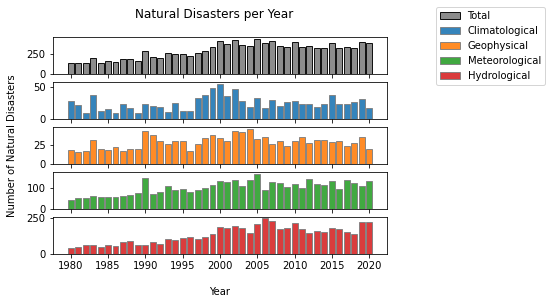

In [120]:
# multiple bar charts

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Natural Disasters per Year")
axs[2].set_ylabel("Number of Natural Disasters\n")
axs[4].set_xlabel("\nYear")

axs[0].bar(disaster_counts_index, disaster_counts, color = 'grey', alpha = 0.9, edgecolor = 'black', label = 'Total')
axs[1].bar(climatological_disaster_counts_index, climatological_disaster_counts, color = 'C0', alpha = 0.9, edgecolor = 'grey', label = 'Climatological')
axs[2].bar(geophysical_disaster_counts_index, geophysical_disaster_counts, color = 'C1', alpha = 0.9, edgecolor = 'grey', label = 'Geophysical')
axs[3].bar(meteorological_disaster_counts_index, meteorological_disaster_counts, color = 'C2', alpha = 0.9, edgecolor = 'grey', label = 'Meteorological')
axs[4].bar(hydrological_disaster_counts_index, hydrological_disaster_counts, color = 'C3', alpha = 0.9, edgecolor = 'grey', label = 'Hydrological')
fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

# BOXPLOT DISASTERS BY DECADE

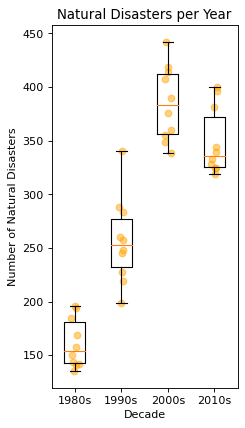

In [216]:
total_box_data = [disaster_counts[0:10], disaster_counts[10:20], disaster_counts[20:30], disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6), dpi=80)
plt.title("Natural Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Natural Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE DISASTER OCCURANCES

In [12]:
# TOTAL NATURAL DISASTER ANALYSIS

print("TOTAL NATURAL DISASTER ANALYSIS")

# total statistical data
print("\nTotal Statistical Data: ")
print(disaster_counts.describe())

# 1980s statistical data
print("\n1980s Statistical Data: ")
print(disaster_counts[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data: ")
print(disaster_counts[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data: ")
print(disaster_counts[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data: ")
print(disaster_counts[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = disaster_counts[0:10].mean()
total_mean_2010s = disaster_counts[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/total_mean_1980s
print("Mean Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = disaster_counts[0:10].max()
total_max_2010s = disaster_counts[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/total_max_1980s
print("Max Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = disaster_counts[0:10].min()
total_min_2010s = disaster_counts[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/total_min_1980s
print("Min Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = disaster_counts[0:10].std()
total_std_2010s = disaster_counts[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/total_std_1980s
print("Standard Deviation of Disasters Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

TOTAL NATURAL DISASTER ANALYSIS

Total Statistical Data: 
count     41.000000
mean     290.463415
std       93.564442
min      135.000000
25%      199.000000
50%      324.000000
75%      360.000000
max      442.000000
Name: Year, dtype: float64

1980s Statistical Data: 
count     10.000000
mean     161.400000
std       23.114209
min      135.000000
25%      142.500000
50%      154.000000
75%      181.000000
max      196.000000
Name: Year, dtype: float64

1990s Statistical Data: 
count     10.000000
mean     256.700000
std       40.011248
min      199.000000
25%      232.250000
50%      252.500000
75%      277.250000
max      340.000000
Name: Year, dtype: float64

2000s Statistical Data: 
count     10.000000
mean     385.000000
std       34.746702
min      338.000000
25%      356.250000
50%      383.000000
75%      412.250000
max      442.000000
Name: Year, dtype: float64

2010s Statistical Data: 
count     10.000000
mean     348.800000
std       31.279386
min      319.000000
25%      3

In [13]:
# CLIMATOLOGICAL DISASTER ANALYSIS

print("CLIMATOLOGICAL DISASTER ANALYSIS")

# climatological statistical data
print("\nTotal Climatological Statistical Data: ")
print(climatological_disaster_counts.describe())

# 1980s climatological statistical data
print("\n1980s Climatological Statistical Data: ")
print(climatological_disaster_counts[0:10].describe())

# 1990s climatological statistical data
print("\n1990s Climatological Statistical Data: ")
print(climatological_disaster_counts[10:20].describe())

# 2000s climatological statistical data
print("\n2000s Climatological Statistical Data: ")
print(climatological_disaster_counts[20:30].describe())

# 2010s climatological statistical data
print("\n2010s Climatological Statistical Data: ")
print(climatological_disaster_counts[30:40].describe())

print("\n")

# climatological statistical changes 1980s-2010s
climatological_mean_1980s = climatological_disaster_counts[0:10].mean()
climatological_mean_2010s = climatological_disaster_counts[30:40].mean()
mean_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_2010s-climatological_mean_1980s)/climatological_mean_1980s
print("Mean Climatological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_climatological_1980_to_2020))

climatological_max_1980s = climatological_disaster_counts[0:10].max()
climatological_max_2010s = climatological_disaster_counts[30:40].max()
max_percent_change_climatological_1980_to_2020 = 100*(climatological_max_2010s-climatological_max_1980s)/climatological_max_1980s
print("Max Climatological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_climatological_1980_to_2020))

climatological_min_1980s = climatological_disaster_counts[0:10].min()
climatological_min_2010s = climatological_disaster_counts[30:40].min()
min_percent_change_climatological_1980_to_2020 = 100*(climatological_min_2010s-climatological_min_1980s)/climatological_min_1980s
print("Min Climatological Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_climatological_1980_to_2020))

climatological_std_1980s = climatological_disaster_counts[0:10].std()
climatological_std_2010s = climatological_disaster_counts[30:40].std()
std_percent_change_climatological_1980_to_2020 = 100*(climatological_std_2010s-climatological_std_1980s)/climatological_std_1980s
print("Standard Deviation of Climatological Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_climatological_1980_to_2020))

CLIMATOLOGICAL DISASTER ANALYSIS

Total Climatological Statistical Data: 
count    41.000000
mean     24.878049
std      10.599988
min       9.000000
25%      18.000000
50%      24.000000
75%      29.000000
max      55.000000
Name: Year, dtype: float64

1980s Climatological Statistical Data: 
count    10.000000
mean     18.600000
std       9.287985
min       9.000000
25%      10.750000
50%      16.500000
75%      22.750000
max      38.000000
Name: Year, dtype: float64

1990s Climatological Statistical Data: 
count    10.000000
mean     24.300000
std      12.147702
min      11.000000
25%      14.500000
50%      22.000000
75%      31.000000
max      48.000000
Name: Year, dtype: float64

2000s Climatological Statistical Data: 
count    10.0000
mean     31.2000
std      11.8865
min      18.0000
25%      22.5000
50%      28.5000
75%      35.2500
max      55.0000
Name: Year, dtype: float64

2010s Climatological Statistical Data: 
count    10.000000
mean     26.200000
std       5.181162
min  

In [14]:
# GEOPHYSICAL DISASTER ANALYSIS

print("GEOPHYSICAL DISASTER ANALYSIS")

# geophysical statistical data
print("\nTotal Geophysical Statistical Data: ")
print(geophysical_disaster_counts.describe())

# 1980s geophysical statistical data
print("\n1980s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[0:10].describe())

# 1990s geophysical statistical data
print("\n1990s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[10:20].describe())

# 2000s geophysical statistical data
print("\n2000s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[20:30].describe())

# 2010s geophysical statistical data
print("\n2010s Geophysical Statistical Data: ")
print(geophysical_disaster_counts[30:40].describe())

print("\n")

# geophysical statistical changes 1980s-2010s
geophysical_mean_1980s = geophysical_disaster_counts[0:10].mean()
geophysical_mean_2010s = geophysical_disaster_counts[30:40].mean()
mean_percent_change_geophysical_1980_to_2020 = 100*(geophysical_mean_2010s-geophysical_mean_1980s)/geophysical_mean_1980s
print("Mean Geophysical Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_geophysical_1980_to_2020))

geophysical_max_1980s = geophysical_disaster_counts[0:10].max()
geophysical_max_2010s = geophysical_disaster_counts[30:40].max()
max_percent_change_geophysical_1980_to_2020 = 100*(geophysical_max_2010s-geophysical_max_1980s)/geophysical_max_1980s
print("Max Geophysical Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_geophysical_1980_to_2020))

geophysical_min_1980s = geophysical_disaster_counts[0:10].min()
geophysical_min_2010s = geophysical_disaster_counts[30:40].min()
min_percent_change_geophysical_1980_to_2020 = 100*(geophysical_min_2010s-geophysical_min_1980s)/geophysical_min_1980s
print("Min Geophysical Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_geophysical_1980_to_2020))

geophysical_std_1980s = geophysical_disaster_counts[0:10].std()
geophysical_std_2010s = geophysical_disaster_counts[30:40].std()
std_percent_change_geophysical_1980_to_2020 = 100*(geophysical_std_2010s-geophysical_std_1980s)/geophysical_std_1980s
print("Standard Deviation of Geophysical Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_geophysical_1980_to_2020))

GEOPHYSICAL DISASTER ANALYSIS

Total Geophysical Statistical Data: 
count    41.000000
mean     29.170732
std       8.021541
min      16.000000
25%      23.000000
50%      30.000000
75%      34.000000
max      47.000000
Name: Year, dtype: float64

1980s Geophysical Statistical Data: 
count    10.000000
mean     20.400000
std       4.501851
min      16.000000
25%      18.250000
50%      19.500000
75%      20.000000
max      32.000000
Name: Year, dtype: float64

1990s Geophysical Statistical Data: 
count    10.000000
mean     31.800000
std       7.420692
min      18.000000
25%      27.750000
50%      31.000000
75%      37.000000
max      44.000000
Name: Year, dtype: float64

2000s Geophysical Statistical Data: 
count    10.000000
mean     34.900000
std       7.489993
min      24.000000
25%      30.250000
50%      34.000000
75%      40.500000
max      47.000000
Name: Year, dtype: float64

2010s Geophysical Statistical Data: 
count    10.000000
mean     30.500000
std       3.689324
min    

In [15]:
# METEOROLOGICAL DISASTER ANALYSIS

print("METEOROLOGICAL DISASTER ANALYSIS")

# meteorological statistical data
print("\nTotal Meteorological Statistical Data: ")
print(meteorological_disaster_counts.describe())

# 1980s meteorological statistical data
print("\n1980s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[0:10].describe())

# 1990s meteorological statistical data
print("\n1990s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[10:20].describe())

# 2000s meteorological statistical data
print("\n2000s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[20:30].describe())

# 2010s meteorological statistical data
print("\n2010s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[30:40].describe())

print("\n")

# meteorological statistical changes 1980s-2010s
meteorological_mean_1980s = meteorological_disaster_counts[0:10].mean()
meteorological_mean_2010s = meteorological_disaster_counts[30:40].mean()
mean_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_2010s-meteorological_mean_1980s)/meteorological_mean_1980s
print("Mean Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_meteorological_1980_to_2020))

meteorological_max_1980s = meteorological_disaster_counts[0:10].max()
meteorological_max_2010s = meteorological_disaster_counts[30:40].max()
max_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_2010s-meteorological_max_1980s)/meteorological_max_1980s
print("Max Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_meteorological_1980_to_2020))

meteorological_min_1980s = meteorological_disaster_counts[0:10].min()
meteorological_min_2010s = meteorological_disaster_counts[30:40].min()
min_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_2010s-meteorological_min_1980s)/meteorological_min_1980s
print("Min Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_meteorological_1980_to_2020))

meteorological_std_1980s = meteorological_disaster_counts[0:10].std()
meteorological_std_2010s = meteorological_disaster_counts[30:40].std()
std_percent_change_meteorological_1980_to_2020 = 100*(meteorological_std_2010s-meteorological_std_1980s)/meteorological_std_1980s
print("Standard Deviation of Meteorological Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_meteorological_1980_to_2020))

METEOROLOGICAL DISASTER ANALYSIS

Total Meteorological Statistical Data: 
count     41.000000
mean     102.390244
std       31.664553
min       45.000000
25%       78.000000
50%      107.000000
75%      128.000000
max      170.000000
Name: Year, dtype: float64

1980s Meteorological Statistical Data: 
count    10.000000
mean     59.600000
std       8.809086
min      45.000000
25%      55.750000
50%      58.500000
75%      63.250000
max      78.000000
Name: Year, dtype: float64

1990s Meteorological Statistical Data: 
count     10.000000
mean      99.100000
std       21.911184
min       74.000000
25%       84.750000
50%       93.000000
75%      109.000000
max      150.000000
Name: Year, dtype: float64

2000s Meteorological Statistical Data: 
count     10.000000
mean     127.200000
std       21.544785
min       90.000000
25%      115.000000
50%      129.000000
75%      135.750000
max      170.000000
Name: Year, dtype: float64

2010s Meteorological Statistical Data: 
count     10.000000
me

In [16]:
# HYDROLOGICAL DISASTER ANALYSIS

print("HYDROLOGICAL DISASTER ANALYSIS")

# hydrological statistical data
print("\nTotal Hydrological Statistical Data: ")
print(hydrological_disaster_counts.describe())

# 1980s hydrological statistical data
print("\n1980s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[0:10].describe())

# 1990s hydrological statistical data
print("\n1990s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[10:20].describe())

# 2000s hydrological statistical data
print("\n2000s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[20:30].describe())

# 2010s hydrological statistical data
print("\n2010s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[30:40].describe())

print("\n")

# hydrological statistical changes 1980s-2010s
hydrological_mean_1980s = hydrological_disaster_counts[0:10].mean()
hydrological_mean_2010s = hydrological_disaster_counts[30:40].mean()
mean_percent_change_hydrological_1980_to_2020 = 100*(hydrological_mean_2010s-hydrological_mean_1980s)/hydrological_mean_1980s
print("Mean Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_hydrological_1980_to_2020))

hydrological_max_1980s = hydrological_disaster_counts[0:10].max()
hydrological_max_2010s = hydrological_disaster_counts[30:40].max()
max_percent_change_hydrological_1980_to_2020 = 100*(hydrological_max_2010s-hydrological_max_1980s)/hydrological_max_1980s
print("Max Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_hydrological_1980_to_2020))

hydrological_min_1980s = hydrological_disaster_counts[0:10].min()
hydrological_min_2010s = hydrological_disaster_counts[30:40].min()
min_percent_change_hydrological_1980_to_2020 = 100*(hydrological_min_2010s-hydrological_min_1980s)/hydrological_min_1980s
print("Min Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_hydrological_1980_to_2020))

hydrological_std_1980s = hydrological_disaster_counts[0:10].std()
hydrological_std_2010s = hydrological_disaster_counts[30:40].std()
std_percent_change_hydrological_1980_to_2020 = 100*(hydrological_std_2010s-hydrological_std_1980s)/hydrological_std_1980s
print("Standard Deviation of Hydrological Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_hydrological_1980_to_2020))

HYDROLOGICAL DISASTER ANALYSIS

Total Hydrological Statistical Data: 
count     41.000000
mean     134.024390
std       58.535241
min       43.000000
25%       81.000000
50%      141.000000
75%      180.000000
max      246.000000
Name: Year, dtype: float64

1980s Hydrological Statistical Data: 
count    10.000000
mean     62.800000
std      14.085453
min      43.000000
25%      54.500000
50%      60.500000
75%      64.750000
max      91.000000
Name: Year, dtype: float64

1990s Hydrological Statistical Data: 
count     10.00000
mean     101.50000
std       23.16247
min       65.00000
25%       89.25000
50%      108.00000
75%      114.50000
max      140.00000
Name: Year, dtype: float64

2000s Hydrological Statistical Data: 
count     10.000000
mean     191.700000
std       28.898481
min      143.000000
25%      179.250000
50%      183.000000
75%      202.500000
max      246.000000
Name: Year, dtype: float64

2010s Hydrological Statistical Data: 
count     10.000000
mean     171.500000
st

# DISASTER SUBGROUP COSTS

In [17]:
disaster_costs = data[['Year', 'Total Damages']]
disaster_costs = disaster_costs.groupby('Year').sum()
disaster_costs = disaster_costs.squeeze()

climatological_costs = climatological_data[['Year', 'Total Damages']]
climatological_costs = climatological_costs.groupby('Year').sum()
climatological_costs = climatological_costs.squeeze()

geophysical_costs = geophysical_data[['Year', 'Total Damages']]
geophysical_costs = geophysical_costs.groupby('Year').sum()
geophysical_costs = geophysical_costs.squeeze()

meteorological_costs = meteorological_data[['Year', 'Total Damages']]
meteorological_costs = meteorological_costs.groupby('Year').sum().groupby('Year').sum()
meteorological_costs = meteorological_costs.squeeze()

hydrological_costs = hydrological_data[['Year', 'Total Damages']]
hydrological_costs = hydrological_costs.groupby('Year').sum()
hydrological_costs = hydrological_costs.squeeze()

In [18]:
japan_tsunami_2011_cost = 2.408585e+02
hurricane_harvey_2017_cost = 9.998350e+01
sichuan_earthquake_2008_cost = 1.018695e+02
hurricane_katrina_2005_cost = 1.651464e+02
izmit_earthquake_1999_cost = 3.097570e+01
kobe_earthquake_1995_cost = 1.692989e+02
irpinia_earthquake_1980_cost = 6.266630e+01

Text(2018, 249.9835, 'Hurricane Harvey')

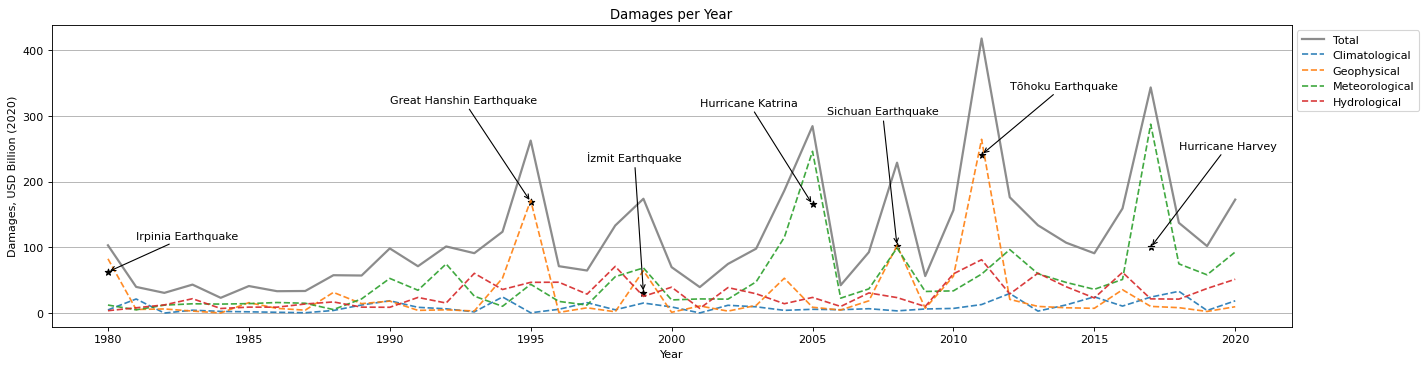

In [212]:
# single line plot

plt.figure(figsize=(20,5), dpi=80)

plt.grid(axis = 'y')
plt.title("Damages per Year")
plt.xlabel("Year")
plt.ylabel("Damages, USD Billion (2020)")

plt.plot(disaster_costs.index, disaster_costs, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
plt.plot(climatological_costs.index, climatological_costs, linestyle = '--', alpha = 0.9, label = 'Climatological')
plt.plot(geophysical_costs.index, geophysical_costs, linestyle = '--', alpha = 0.9, label = 'Geophysical')
plt.plot(meteorological_costs.index, meteorological_costs, linestyle = '--', alpha = 0.9, label = 'Meteorological')
plt.plot(hydrological_costs.index, hydrological_costs, linestyle = '--', alpha = 0.9, label = 'Hydrological')
plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.scatter([1980, 1995, 1999, 2005, 2008, 2011, 2017], [irpinia_earthquake_1980_cost, kobe_earthquake_1995_cost,izmit_earthquake_1999_cost,hurricane_katrina_2005_cost,sichuan_earthquake_2008_cost,japan_tsunami_2011_cost, hurricane_harvey_2017_cost], c='black', marker = "*")

plt.annotate("Irpinia Earthquake",
            xy=(1980, irpinia_earthquake_1980_cost), xycoords='data',
            xytext=(1980+1, irpinia_earthquake_1980_cost+50), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Great Hanshin Earthquake",
            xy=(1995, kobe_earthquake_1995_cost), xycoords='data',
            xytext=(1995-5, kobe_earthquake_1995_cost+150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("İzmit Earthquake",
            xy=(1999, izmit_earthquake_1999_cost), xycoords='data',
            xytext=(1999-2, izmit_earthquake_1999_cost+200), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Hurricane Katrina",
            xy=(2005, hurricane_katrina_2005_cost), xycoords='data',
            xytext=(2005-4, hurricane_katrina_2005_cost+150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Sichuan Earthquake",
            xy=(2008, sichuan_earthquake_2008_cost), xycoords='data',
            xytext=(2008-2.5, sichuan_earthquake_2008_cost+200), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Tōhoku Earthquake",
            xy=(2011, japan_tsunami_2011_cost), xycoords='data',
            xytext=(2011+1, japan_tsunami_2011_cost+100), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("Hurricane Harvey",
            xy=(2017, hurricane_harvey_2017_cost), xycoords='data',
            xytext=(2017+1, hurricane_harvey_2017_cost+150), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

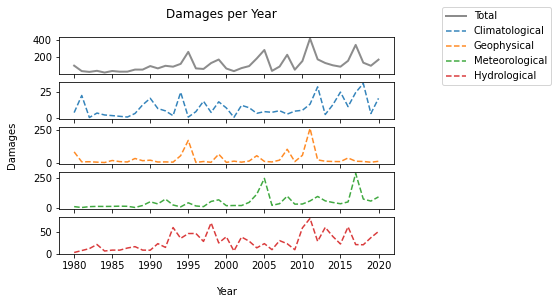

In [187]:
# multiple line plots

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Damages per Year")
axs[2].set_ylabel("Damages\n")
axs[4].set_xlabel("\nYear")

axs[0].plot(disaster_costs.index, disaster_costs, linewidth=2, color = 'grey', alpha = 0.9, label = 'Total')
axs[1].plot(climatological_costs.index, climatological_costs, linestyle = '--', color = 'C0', alpha = 0.9, label = 'Climatological')
axs[2].plot(geophysical_costs.index, geophysical_costs, linestyle = '--', color = 'C1', alpha = 0.9, label = 'Geophysical')
axs[3].plot(meteorological_costs.index, meteorological_costs, linestyle = '--', color = 'C2', alpha = 0.9, label = 'Meteorological')
axs[4].plot(hydrological_costs.index, hydrological_costs, linestyle = '--', color = 'C3', alpha = 0.9, label = 'Hydrological')
fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')


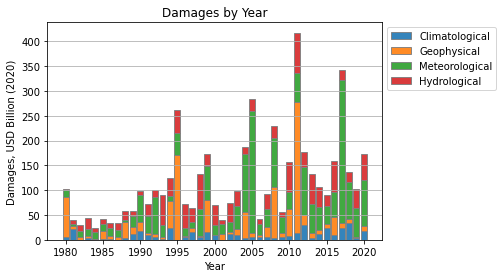

In [200]:
# bar chart

bottom1 = climatological_costs
bottom2 = np.add(bottom1, geophysical_costs).tolist()
bottom3 = np.add(bottom2, meteorological_costs).tolist()

plt.grid(axis = 'y')
plt.title("Damages by Year")
plt.xlabel("Year")
plt.ylabel("Damages, USD Billion (2020)")

plt.bar(climatological_costs.index, climatological_costs,  edgecolor='grey', alpha = 0.9, label = "Climatological")
plt.bar(geophysical_costs.index, geophysical_costs, bottom = bottom1,  edgecolor='grey', alpha = 0.9, label = "Geophysical")
plt.bar(meteorological_costs.index, meteorological_costs, bottom = bottom2,  edgecolor='grey', alpha = 0.9, label = "Meteorological")
plt.bar(hydrological_costs.index, hydrological_costs, bottom = bottom3,  edgecolor='grey', alpha = 0.9, label = "Hydrological")
plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

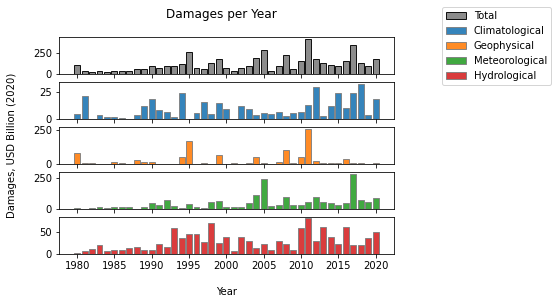

In [196]:
# multiple bar charts

fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Damages per Year")
axs[2].set_ylabel("Damages, USD Billion (2020)\n")
axs[4].set_xlabel("\nYear")

axs[0].bar(disaster_costs.index, disaster_costs, color = 'grey', alpha = 0.9, edgecolor = 'black', label = 'Total')
axs[1].bar(climatological_costs.index, climatological_costs, color = 'C0', alpha = 0.9, edgecolor = 'grey', label = 'Climatological')
axs[2].bar(geophysical_costs.index, geophysical_costs, color = 'C1', alpha = 0.9, edgecolor = 'grey', label = 'Geophysical')
axs[3].bar(meteorological_costs.index, meteorological_costs, color = 'C2', alpha = 0.9, edgecolor = 'grey', label = 'Meteorological')
axs[4].bar(hydrological_costs.index, hydrological_costs, color = 'C3', alpha = 0.9, edgecolor = 'grey', label = 'Hydrological')
fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

# BOXPLOT TOTAL DAMAGES BY DECADE

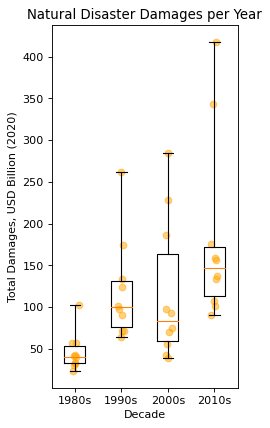

In [215]:
total_box_cost_data = [disaster_costs[0:10], disaster_costs[10:20], disaster_costs[20:30], disaster_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6), dpi=80)
plt.title("Natural Disaster Damages per Year")
plt.xlabel("Decade")
plt.ylabel("Total Damages, USD Billion (2020)")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_cost_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_cost_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_cost_data[3], color = 'orange', alpha = 0.5)


# ANALYZE DISASTER COSTS

In [22]:
# TOTAL NATURAL DISASTER COST ANALYSIS

print("TOTAL NATURAL DISASTER COST ANALYSIS")

# total costs statistical data
print("\nTotal Costs Statistical Data: ")
print(disaster_costs.describe())

# 1980s costs statistical data
print("\n1980s Costs Statistical Data: ")
print(disaster_costs[0:10].describe())

# 1990s costs statistical data
print("\n1990s Costs Statistical Data: ")
print(disaster_costs[10:20].describe())

# 2000s costs statistical data
print("\n2000s Costs Statistical Data: ")
print(disaster_costs[20:30].describe())

# 2010s costs statistical data
print("\n2010s Costs Statistical Data: ")
print(disaster_costs[30:40].describe())

print("\n")

# total costs statistical changes 1980s-2010s
total_mean_costs_1980s = disaster_costs[0:10].mean()
total_mean_costs_2010s = disaster_costs[30:40].mean()
mean_costs_percent_change_1980_to_2020 = 100*(total_mean_costs_2010s-total_mean_costs_1980s)/total_mean_costs_1980s
print("Mean Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_1980_to_2020))

total_max_costs_1980s = disaster_costs[0:10].max()
total_max_costs_2010s = disaster_costs[30:40].max()
max_costs_percent_change_1980_to_2020 = 100*(total_max_costs_2010s-total_max_costs_1980s)/total_max_costs_1980s
print("Max Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_1980_to_2020))

total_min_costs_1980s = disaster_costs[0:10].min()
total_min_costs_2010s = disaster_costs[30:40].min()
min_costs_percent_change_1980_to_2020 = 100*(total_min_costs_2010s-total_min_costs_1980s)/total_min_costs_1980s
print("Min Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_1980_to_2020))

total_std_costs_1980s = disaster_costs[0:10].std()
total_std_costs_2010s = disaster_costs[30:40].std()
std_costs_percent_change_1980_to_2020 = 100*(total_std_costs_2010s-total_std_costs_1980s)/total_std_costs_1980s
print("Standard Deviation of Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_1980_to_2020))

TOTAL NATURAL DISASTER COST ANALYSIS

Total Costs Statistical Data: 
count     41.000000
mean     117.590434
std       87.493362
min       23.166825
25%       57.083580
50%       97.940144
75%      156.394215
max      417.597259
Name: Total Damages, dtype: float64

1980s Costs Statistical Data: 
count     10.000000
mean      46.244717
std       22.743595
min       23.166825
25%       33.310139
50%       40.422289
75%       53.629089
max      103.053508
Name: Total Damages, dtype: float64

1990s Costs Statistical Data: 
count     10.000000
mean     119.085427
std       60.381245
min       64.701929
25%       76.215616
50%       99.809698
75%      130.768059
max      262.357447
Name: Total Damages, dtype: float64

2000s Costs Statistical Data: 
count     10.000000
mean     117.242352
std       85.329592
min       39.446203
25%       59.636917
50%       83.648336
75%      164.193192
max      284.323077
Name: Total Damages, dtype: float64

2010s Costs Statistical Data: 
count     10.000000

In [23]:
# CLIMATOLOGICAL DISASTER COST ANALYSIS

print("CLIMATOLOGICAL DISASTER COST ANALYSIS")

# climatological costs statistical data
print("\nTotal Climatological Costs Statistical Data: ")
print(climatological_costs.describe())

# 1980s climatological costs statistical data
print("\n1980s Climatological Costs Statistical Data: ")
print(climatological_costs[0:10].describe())

# 1990s climatological costs statistical data
print("\n1990s Climatological Costs Statistical Data: ")
print(climatological_costs[10:20].describe())

# 2000s climatological costs statistical data
print("\n2000s Climatological Costs Statistical Data: ")
print(climatological_costs[20:30].describe())

# 2010s climatological costs statistical data
print("\n2010s Climatological Costs Statistical Data: ")
print(climatological_costs[30:40].describe())

print("\n")

# climatological costs statistical changes 1980s-2010s
climatological_mean_costs_1980s = climatological_costs[0:10].mean()
climatological_mean_costs_2010s = climatological_costs[30:40].mean()
mean_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_costs_2010s-climatological_mean_costs_1980s)/climatological_mean_costs_1980s
print("Mean Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_climatological_1980_to_2020))

climatological_max_costs_1980s = climatological_costs[0:10].max()
climatological_max_costs_2010s = climatological_costs[30:40].max()
max_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_max_costs_2010s-climatological_max_costs_1980s)/climatological_max_costs_1980s
print("Max Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_climatological_1980_to_2020))

climatological_min_costs_1980s = climatological_costs[0:10].min()
climatological_min_costs_2010s = climatological_costs[30:40].min()
min_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_min_costs_2010s-climatological_min_costs_1980s)/climatological_min_costs_1980s
print("Min Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_climatological_1980_to_2020))

climatological_std_costs_1980s = climatological_costs[0:10].std()
climatological_std_costs_2010s = climatological_costs[30:40].std()
std_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_std_costs_2010s-climatological_std_costs_1980s)/climatological_std_costs_1980s
print("Standard Deviation of Climatological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_climatological_1980_to_2020))

CLIMATOLOGICAL DISASTER COST ANALYSIS

Total Climatological Costs Statistical Data: 
count    41.000000
mean      9.677076
std       8.590469
min       0.000000
25%       3.901167
50%       6.459137
75%      12.936397
max      33.035825
Name: Total Damages, dtype: float64

1980s Climatological Costs Statistical Data: 
count    10.000000
mean      5.268973
std       6.650199
min       0.000000
25%       1.349829
50%       3.209343
75%       4.671573
max      21.384256
Name: Total Damages, dtype: float64

1990s Climatological Costs Statistical Data: 
count    10.000000
mean     10.216700
std       7.899228
min       0.418676
25%       5.138738
50%       7.588558
75%      15.651043
max      24.449320
Name: Total Damages, dtype: float64

2000s Climatological Costs Statistical Data: 
count    10.000000
mean      6.179280
std       3.378803
min       0.184159
25%       4.339011
50%       5.941260
75%       8.632401
max      11.808952
Name: Total Damages, dtype: float64

2010s Climatological 

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


In [24]:
# GEOPHYSICAL DISASTER COST ANALYSIS

print("GEOPHYSICAL DISASTER COST ANALYSIS")

# geophysical costs statistical data
print("\nTotal Geophysical Costs Statistical Data: ")
print(geophysical_costs.describe())

# 1980s geophysical costs statistical data
print("\n1980s Geophysical Costs Statistical Data: ")
print(geophysical_costs[0:10].describe())

# 1990s geophysical costs statistical data
print("\n1990s Geophysical Costs Statistical Data: ")
print(geophysical_costs[10:20].describe())

# 2000s geophysical costs statistical data
print("\n2000s Geophysical Costs Statistical Data: ")
print(geophysical_costs[20:30].describe())

# 2010s geophysical costs statistical data
print("\n2010s Geophysical Costs Statistical Data: ")
print(geophysical_costs[30:40].describe())

print("\n")

# geophysical costs statistical changes 1980s-2010s
geophysical_mean_costs_1980s = geophysical_costs[0:10].mean()
geophysical_mean_costs_2010s = geophysical_costs[30:40].mean()
mean_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_mean_costs_2010s-geophysical_mean_costs_1980s)/geophysical_mean_costs_1980s
print("Mean Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_geophysical_1980_to_2020))

geophysical_max_costs_1980s = geophysical_costs[0:10].max()
geophysical_max_costs_2010s = geophysical_costs[30:40].max()
max_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_max_costs_2010s-geophysical_max_costs_1980s)/geophysical_max_costs_1980s
print("Max Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_geophysical_1980_to_2020))

geophysical_min_costs_1980s = geophysical_costs[0:10].min()
geophysical_min_costs_2010s = geophysical_costs[30:40].min()
min_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_min_costs_2010s-geophysical_min_costs_1980s)/geophysical_min_costs_1980s
print("Min Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_geophysical_1980_to_2020))

geophysical_std_costs_1980s = geophysical_costs[0:10].std()
geophysical_std_costs_2010s = geophysical_costs[30:40].std()
std_costs_percent_change_geophysical_1980_to_2020 = 100*(geophysical_std_costs_2010s-geophysical_std_costs_1980s)/geophysical_std_costs_1980s
print("Standard Deviation of Geophysical Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_geophysical_1980_to_2020))

GEOPHYSICAL DISASTER COST ANALYSIS

Total Geophysical Costs Statistical Data: 
count     41.000000
mean      28.161210
std       50.500344
min        0.121696
25%        4.583419
50%        8.858584
75%       20.828011
max      264.260624
Name: Total Damages, dtype: float64

1980s Geophysical Costs Statistical Data: 
count    10.000000
mean     17.038030
std      24.704008
min       0.121696
25%       4.664843
50%       6.661707
75%      15.462110
max      82.493915
Name: Total Damages, dtype: float64

1990s Geophysical Costs Statistical Data: 
count     10.000000
mean      33.043633
std       53.679176
min        0.968632
25%        3.394277
50%        6.440068
75%       44.401994
max      171.476938
Name: Total Damages, dtype: float64

2000s Geophysical Costs Statistical Data: 
count     10.000000
mean      22.157442
std       32.018048
min        1.164298
25%        5.251334
50%        9.805236
75%       16.866048
max      102.823453
Name: Total Damages, dtype: float64

2010s Geophy

In [25]:
# METEOROLOGICAL DISASTER COST ANALYSIS

print("METEOROLOGICAL DISASTER COST ANALYSIS")

# meteorological costs statistical data
print("\nTotal Meteorological Costs Statistical Data: ")
print(meteorological_costs.describe())

# 1980s meteorological costs statistical data
print("\n1980s Meteorological Costs Statistical Data: ")
print(meteorological_costs[0:10].describe())

# 1990s meteorological costs statistical data
print("\n1990s Meteorological Costs Statistical Data: ")
print(meteorological_costs[10:20].describe())

# 2000s meteorological costs statistical data
print("\n2000s Meteorological Costs Statistical Data: ")
print(meteorological_costs[20:30].describe())

# 2010s meteorological costs statistical data
print("\n2010s Meteorological Costs Statistical Data: ")
print(meteorological_costs[30:40].describe())

print("\n")

# meteorological costs statistical changes 1980s-2010s
meteorological_mean_costs_1980s = meteorological_costs[0:10].mean()
meteorological_mean_costs_2010s = meteorological_costs[30:40].mean()
mean_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_costs_2010s-meteorological_mean_costs_1980s)/meteorological_mean_costs_1980s
print("Mean Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_meteorological_1980_to_2020))

meteorological_max_costs_1980s = meteorological_costs[0:10].max()
meteorological_max_costs_2010s = meteorological_costs[30:40].max()
max_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_costs_2010s-meteorological_max_costs_1980s)/meteorological_max_costs_1980s
print("Max Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_meteorological_1980_to_2020))

meteorological_min_costs_1980s = meteorological_costs[0:10].min()
meteorological_min_costs_2010s = meteorological_costs[30:40].min()
min_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_costs_2010s-meteorological_min_costs_1980s)/meteorological_min_costs_1980s
print("Min Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_meteorological_1980_to_2020))

meteorological_std_costs_1980s = meteorological_costs[0:10].std()
meteorological_std_costs_2010s = meteorological_costs[30:40].std()
std_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_std_costs_2010s-meteorological_std_costs_1980s)/meteorological_std_costs_1980s
print("Standard Deviation of Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_meteorological_1980_to_2020))

METEOROLOGICAL DISASTER COST ANALYSIS

Total Meteorological Costs Statistical Data: 
count     41.000000
mean      50.812162
std       57.079535
min        4.901970
25%       16.020657
50%       34.682344
75%       59.243479
max      287.256788
Name: Total Damages, dtype: float64

1980s Meteorological Costs Statistical Data: 
count    10.000000
mean     12.898211
std       4.895956
min       4.901970
25%      12.073083
50%      13.862893
75%      14.776082
max      21.548437
Name: Total Damages, dtype: float64

1990s Meteorological Costs Statistical Data: 
count    10.000000
mean     39.558125
std      23.150898
min      10.249165
25%      19.692493
50%      39.215546
75%      54.641160
max      74.696982
Name: Total Damages, dtype: float64

2000s Meteorological Costs Statistical Data: 
count     10.000000
mean      66.250009
std       71.633825
min       19.970988
25%       21.776088
50%       34.803095
75%       86.185080
max      245.993409
Name: Total Damages, dtype: float64

2010s

In [26]:
# HYDROLOGICAL DISASTER COST ANALYSIS

print("HYDROLOGICAL DISASTER COST ANALYSIS")

# hydrological costs statistical data
print("\nTotal Hydrological Costs Statistical Data: ")
print(hydrological_costs.describe())

# 1980s hydrological costs statistical data
print("\n1980s Hydrological Costs Statistical Data: ")
print(hydrological_costs[0:10].describe())

# 1990s hydrological costs statistical data
print("\n1990s Hydrological Costs Statistical Data: ")
print(hydrological_costs[10:20].describe())

# 2000s hydrological costs statistical data
print("\n2000s Hydrological Costs Statistical Data: ")
print(hydrological_costs[20:30].describe())

# 2010s hydrological costs statistical data
print("\n2010s Hydrological Costs Statistical Data: ")
print(hydrological_costs[30:40].describe())

print("\n")

# hydrological costs statistical changes 1980s-2010s
hydrological_mean_costs_1980s = hydrological_costs[0:10].mean()
hydrological_mean_costs_2010s = hydrological_costs[30:40].mean()
mean_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_mean_costs_2010s-hydrological_mean_costs_1980s)/hydrological_mean_costs_1980s
print("Mean Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_hydrological_1980_to_2020))

hydrological_max_costs_1980s = hydrological_costs[0:10].max()
hydrological_max_costs_2010s = hydrological_costs[30:40].max()
max_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_max_costs_2010s-hydrological_max_costs_1980s)/hydrological_max_costs_1980s
print("Max Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_hydrological_1980_to_2020))

hydrological_min_costs_1980s = hydrological_costs[0:10].min()
hydrological_min_costs_2010s = hydrological_costs[30:40].min()
min_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_min_costs_2010s-hydrological_min_costs_1980s)/hydrological_min_costs_1980s
print("Min Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_hydrological_1980_to_2020))

hydrological_std_costs_1980s = hydrological_costs[0:10].std()
hydrological_std_costs_2010s = hydrological_costs[30:40].std()
std_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_std_costs_2010s-hydrological_std_costs_1980s)/hydrological_std_costs_1980s
print("Standard Deviation of Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_hydrological_1980_to_2020))

HYDROLOGICAL DISASTER COST ANALYSIS

Total Hydrological Costs Statistical Data: 
count    41.000000
mean     28.939986
std      19.893487
min       3.587959
25%      12.411392
50%      23.724374
75%      39.351711
max      81.156760
Name: Total Damages, dtype: float64

1980s Hydrological Costs Statistical Data: 
count    10.000000
mean     11.039503
std       5.314683
min       3.587959
25%       8.247975
50%       9.000335
75%      13.424207
max      21.817150
Name: Total Damages, dtype: float64

1990s Hydrological Costs Statistical Data: 
count    10.000000
mean     36.266969
std      19.837327
min       8.769764
25%      24.128325
50%      32.281213
75%      46.857171
max      70.976227
Name: Total Damages, dtype: float64

2000s Hydrological Costs Statistical Data: 
count    10.000000
mean     22.655621
std      11.939889
min       7.027196
25%      11.077572
50%      23.643441
75%      30.278567
max      39.351711
Name: Total Damages, dtype: float64

2010s Hydrological Costs Statis